HW3 - Q2

Pouria Dadkhah 401201381

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Analysis of COCO Dataset

In [ ]:
from torchvision import datasets, transforms
from torchvision.datasets.utils import download_and_extract_archive
import torch

# Set the path to store the dataset locally in Colab
local_data_path = '/content/gdrive/MyDrive/Deep Learning/DL_HW3/coco_subset'

# Download annotations file (instances_trainval2017.json)
download_and_extract_archive(
    url='http://images.cocodataset.org/annotations/annotations_trainval2017.zip',
    download_root=local_data_path,
    filename='annotations_trainval2017.zip'
)

# Define the data transformations (resize, normalization, etc.)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to a common size
    transforms.ToTensor(),           # Convert images to tensors
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize images
])

# Download images (train2017 and val2017)
train_dataset = datasets.CocoDetection(
    root=local_data_path,
    annFile=f'{local_data_path}/annotations/instances_train2017.json',
    transform=transform
)

test_dataset = datasets.CocoDetection(
    root=local_data_path,
    annFile=f'{local_data_path}/annotations/instances_val2017.json',
    transform=transform
)

# Load subsets of the data (e.g., first 1000 images for training and first 500 images for testing)
train_subset = torch.utils.data.Subset(train_dataset, range(1000))
test_subset = torch.utils.data.Subset(test_dataset, range(500))

# Create data loaders
batch_size = 32
train_loader = torch.utils.data.DataLoader(train_subset, batch_size=batch_size, shuffle=True, num_workers=4)
test_loader = torch.utils.data.DataLoader(test_subset, batch_size=batch_size, shuffle=False, num_workers=4)


100%|██████████| 252907541/252907541 [00:17<00:00, 14159801.16it/s]


Extracting /content/gdrive/MyDrive/Deep Learning/DL_HW3/coco_subset/annotations_trainval2017.zip to /content/gdrive/MyDrive/Deep Learning/DL_HW3/coco_subset
loading annotations into memory...
Done (t=27.21s)
creating index...
index created!
loading annotations into memory...
Done (t=0.59s)
creating index...
index created!


In [ ]:
# Explore the dataset
print("Number of training images:", len(train_dataset))
print("Number of test images:", len(test_dataset))

# Print class labels
print("Class Labels:")
print(train_dataset.coco.cats)

# Check the number of classes
num_classes = len(train_dataset.coco.cats)
print("Number of Classes:", num_classes)



Number of training images: 118287
Number of test images: 5000
Class Labels:
{1: {'supercategory': 'person', 'id': 1, 'name': 'person'}, 2: {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'}, 3: {'supercategory': 'vehicle', 'id': 3, 'name': 'car'}, 4: {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'}, 5: {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'}, 6: {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'}, 7: {'supercategory': 'vehicle', 'id': 7, 'name': 'train'}, 8: {'supercategory': 'vehicle', 'id': 8, 'name': 'truck'}, 9: {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'}, 10: {'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'}, 11: {'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'}, 13: {'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'}, 14: {'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'}, 15: {'supercategory': 'outdoor', 'id': 15, 'name': 'bench'}, 16: {'supercategory': 'animal', 'id': 16, 'name': 'bird

# Data preproccessing Cifar10

after analysisng the coco dataset and lack of time decided to use cifar10 for our experiment to avoide new challanges :)

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

# Step 1: Load the CIFAR-10 dataset
transform = transforms.Compose([#transforms.Resize((224, 224)),  # Resize images to a common size
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

# Check the size of the datasets
print(f"Training dataset size: {len(train_dataset)}")
print(f"Testing dataset size: {len(test_dataset)}")


100%|██████████| 170498071/170498071 [00:03<00:00, 44603620.05it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Training dataset size: 50000
Testing dataset size: 10000


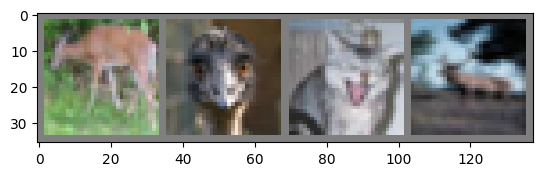

 deer  bird   cat  deer

Number of classes in the training dataset: 10
Number of classes in the test dataset: 10


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to show an image
def imshow(img):
    img = img / 2 + 0.5     # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get a batch of training data
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Visualize a sample image and label from the batch
imshow(torchvision.utils.make_grid(images[:4]))
print(' '.join('%5s' % train_dataset.classes[labels[j]] for j in range(4)))

# Number of classes in the dataset
num_classes = len(train_dataset.classes)
print(f"\nNumber of classes in the training dataset: {num_classes}")

# Number of classes in the test dataset
num_classes_test = len(test_dataset.classes)
print(f"Number of classes in the test dataset: {num_classes_test}")


# Models (CNN and DCN)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
from tqdm import tqdm

# Define a simple CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(128 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 128 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the model, loss function, and optimizer
simple_cnn = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(simple_cnn.parameters(), lr=0.01, momentum=0.9)

# Training the CNN
num_epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
simple_cnn.to(device)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

for epoch in range(num_epochs):
    simple_cnn.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for data in tqdm(train_loader, desc=f"Epoch {epoch + 1}"):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = simple_cnn(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = outputs.max(1)
        total_train += labels.size(0)
        correct_train += predicted.eq(labels).sum().item()

    train_accuracy = 100 * correct_train / total_train
    print(f'Training Loss: {running_loss / len(train_loader):.4f}, Training Accuracy: {train_accuracy:.2f}%')

    # Validation on the test set
    simple_cnn.eval()
    correct_test = 0
    total_test = 0

    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)

            outputs = simple_cnn(images)
            _, predicted = outputs.max(1)
            total_test += labels.size(0)
            correct_test += predicted.eq(labels).sum().item()

    test_accuracy = 100 * correct_test / total_test
    print(f'Test Accuracy: {test_accuracy:.2f}%')

print('Finished Training')


Epoch 1: 100%|██████████| 782/782 [00:17<00:00, 45.61it/s]

Training Loss: 1.4679, Training Accuracy: 46.94%


Test Accuracy: 54.39%


Epoch 2: 100%|██████████| 782/782 [00:15<00:00, 49.86it/s]

Training Loss: 1.0123, Training Accuracy: 64.21%


Test Accuracy: 65.98%


Epoch 3: 100%|██████████| 782/782 [00:15<00:00, 49.61it/s]

Training Loss: 0.7959, Training Accuracy: 72.32%


Test Accuracy: 71.59%


Epoch 4: 100%|██████████| 782/782 [00:16<00:00, 48.51it/s]

Training Loss: 0.6331, Training Accuracy: 77.91%


Test Accuracy: 70.54%


Epoch 5: 100%|██████████| 782/782 [00:16<00:00, 48.74it/s]

Training Loss: 0.4861, Training Accuracy: 82.96%


Test Accuracy: 75.31%


Epoch 6: 100%|██████████| 782/782 [00:15<00:00, 49.80it/s]

Training Loss: 0.3340, Training Accuracy: 88.55%


Test Accuracy: 75.11%


Epoch 7: 100%|██████████| 782/782 [00:15<00:00, 48.98it/s]

Training Loss: 0.2048, Training Accuracy: 93.14%


Test Accuracy: 74.72%


Epoch 8: 100%|██████████| 782/782 [00:16<00:00, 48.36it/s]

Training Loss: 0.1124, Training Accuracy: 96.43%


Test Accuracy: 74.38%


Epoch 9: 100%|██████████| 782/782 [00:15<00:00, 49.65it/s]

Training Loss: 0.0595, Training Accuracy: 98.15%


Test Accuracy: 75.85%


Epoch 10: 100%|██████████| 782/782 [00:15<00:00, 49.70it/s]

Training Loss: 0.0317, Training Accuracy: 99.16%


Test Accuracy: 75.16%
Finished Training


Regularized simple cnn model

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
from tqdm import tqdm

# Define a simple CNN model with regularization and dropout
class RegularizedCNN(nn.Module):
    def __init__(self, dropout_rate=0.2, weight_decay=1e-5):
        super(RegularizedCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(128 * 8 * 8, 512)
        self.dropout = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(512, 10)

        # Add regularization to the weights
        self.weight_decay = weight_decay
        self.apply(self._init_weights)

    def _init_weights(self, m):
        if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
            nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            if m.bias is not None:
                nn.init.constant_(m.bias, 0)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 128 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Instantiate the model, loss function, and optimizer with weight decay
regularized_cnn = RegularizedCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(regularized_cnn.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4)

# Training the CNN with early stopping
num_epochs = 20
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
regularized_cnn.to(device)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

best_test_accuracy = 0.0
early_stopping_patience = 5
early_stopping_counter = 0

for epoch in range(num_epochs):
    regularized_cnn.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for data in tqdm(train_loader, desc=f"Epoch {epoch + 1}"):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = regularized_cnn(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = outputs.max(1)
        total_train += labels.size(0)
        correct_train += predicted.eq(labels).sum().item()

    train_accuracy = 100 * correct_train / total_train
    print(f'Training Loss: {running_loss / len(train_loader):.4f}, Training Accuracy: {train_accuracy:.2f}%')

    # Validation on the test set
    regularized_cnn.eval()
    correct_test = 0
    total_test = 0

    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)

            outputs = regularized_cnn(images)
            _, predicted = outputs.max(1)
            total_test += labels.size(0)
            correct_test += predicted.eq(labels).sum().item()

    test_accuracy = 100 * correct_test / total_test
    print(f'Test Accuracy: {test_accuracy:.2f}%')

    # Early stopping based on validation accuracy
    if test_accuracy > best_test_accuracy:
        best_test_accuracy = test_accuracy
        early_stopping_counter = 0
    else:
        early_stopping_counter += 1

    if early_stopping_counter >= early_stopping_patience:
        print("Early stopping! Test accuracy did not improve.")
        break

print('Finished Training')


Epoch 1: 100%|██████████| 782/782 [00:15<00:00, 50.09it/s]

Training Loss: 1.7435, Training Accuracy: 37.44%


Test Accuracy: 48.40%


Epoch 2: 100%|██████████| 782/782 [00:16<00:00, 48.39it/s]

Training Loss: 1.3770, Training Accuracy: 50.77%


Test Accuracy: 54.01%


Epoch 3: 100%|██████████| 782/782 [00:17<00:00, 44.15it/s]

Training Loss: 1.2284, Training Accuracy: 56.13%


Test Accuracy: 58.08%


Epoch 4: 100%|██████████| 782/782 [00:16<00:00, 47.64it/s]

Training Loss: 1.1215, Training Accuracy: 60.18%


Test Accuracy: 60.60%


Epoch 5: 100%|██████████| 782/782 [00:15<00:00, 49.80it/s]

Training Loss: 1.0341, Training Accuracy: 63.50%


Test Accuracy: 61.68%


Epoch 6: 100%|██████████| 782/782 [00:15<00:00, 50.79it/s]

Training Loss: 0.9499, Training Accuracy: 66.36%


Test Accuracy: 63.94%


Epoch 7: 100%|██████████| 782/782 [00:16<00:00, 47.39it/s]

Training Loss: 0.8706, Training Accuracy: 69.22%


Test Accuracy: 64.80%


Epoch 8: 100%|██████████| 782/782 [00:15<00:00, 49.94it/s]

Training Loss: 0.7960, Training Accuracy: 72.08%


Test Accuracy: 65.49%


Epoch 9: 100%|██████████| 782/782 [00:15<00:00, 49.52it/s]

Training Loss: 0.7341, Training Accuracy: 73.93%


Test Accuracy: 66.45%


Epoch 10: 100%|██████████| 782/782 [00:16<00:00, 47.46it/s]

Training Loss: 0.6738, Training Accuracy: 76.21%


Test Accuracy: 66.51%


Epoch 11: 100%|██████████| 782/782 [00:15<00:00, 50.14it/s]

Training Loss: 0.6080, Training Accuracy: 78.23%


Test Accuracy: 66.78%


Epoch 12: 100%|██████████| 782/782 [00:15<00:00, 48.97it/s]

Training Loss: 0.5546, Training Accuracy: 80.28%


Test Accuracy: 67.19%


Epoch 13: 100%|██████████| 782/782 [00:16<00:00, 47.30it/s]

Training Loss: 0.5068, Training Accuracy: 82.10%


Test Accuracy: 68.10%


Epoch 14: 100%|██████████| 782/782 [00:15<00:00, 49.82it/s]

Training Loss: 0.4609, Training Accuracy: 83.51%


Test Accuracy: 66.66%


Epoch 15: 100%|██████████| 782/782 [00:15<00:00, 49.11it/s]

Training Loss: 0.4246, Training Accuracy: 84.86%


Test Accuracy: 67.53%


Epoch 16: 100%|██████████| 782/782 [00:16<00:00, 47.47it/s]

Training Loss: 0.3822, Training Accuracy: 86.34%


Test Accuracy: 67.63%


Epoch 17: 100%|██████████| 782/782 [00:15<00:00, 49.99it/s]

Training Loss: 0.3563, Training Accuracy: 87.40%


Test Accuracy: 67.61%


Epoch 18: 100%|██████████| 782/782 [00:16<00:00, 47.63it/s]

Training Loss: 0.3226, Training Accuracy: 88.57%


Test Accuracy: 67.84%
Early stopping! Test accuracy did not improve.
Finished Training


Deformable Network

this part has some issues that have been fixed directely in the next session

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.ops as ops
from torch.utils.data import DataLoader
from tqdm import tqdm
import time
import matplotlib.pyplot as plt

class DeformableConv2d(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride=1, padding=0, deformable_groups=1):
        super(DeformableConv2d, self).__init__()
        self.conv_offset = nn.Conv2d(in_channels, deformable_groups * 2 * kernel_size * kernel_size, kernel_size=kernel_size, stride=stride, padding=padding)
        self.conv_weight = nn.Conv2d(in_channels, out_channels, kernel_size=kernel_size, stride=stride, padding=padding)
        self.kernel_size = kernel_size
        self.deformable_groups = deformable_groups

    def forward(self, x):
        offsets = self.conv_offset(x)
        weights = self.conv_weight(x)

        # Ensure that the number of channels in the offset tensor is a multiple of 2 * weight.size[2] * weight.size[3]
        offset_channels = weights.size(2) * weights.size(3) * 2
        offsets = offsets[:, :offset_channels, :, :]

        return ops.deform_conv2d(x, offsets, weights, self.kernel_size, padding=self.kernel_size // 2)

class DeformableCNN(nn.Module):
    def __init__(self):
        super(DeformableCNN, self).__init__()
        self.conv1 = DeformableConv2d(3, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = DeformableConv2d(64, 128, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(128 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 128 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Training function for DeformableCNN
def train_deformable_cnn(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    start_time = time.time()

    for data in tqdm(train_loader, desc="Training"):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = outputs.max(1)
        total_train += labels.size(0)
        correct_train += predicted.eq(labels).sum().item()

    end_time = time.time()
    execution_time = end_time - start_time
    train_accuracy = 100 * correct_train / total_train
    avg_loss = running_loss / len(train_loader)

    return avg_loss, train_accuracy, execution_time

# Testing function for DeformableCNN
def test_deformable_cnn(model, test_loader, criterion, device):
    model.eval()
    correct_test = 0
    total_test = 0
    running_loss = 0.0
    start_time = time.time()

    with torch.no_grad():
        for data in tqdm(test_loader, desc="Testing"):
            images, labels = data
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()

            _, predicted = outputs.max(1)
            total_test += labels.size(0)
            correct_test += predicted.eq(labels).sum().item()

    end_time = time.time()
    execution_time = end_time - start_time
    test_accuracy = 100 * correct_test / total_test
    avg_loss = running_loss / len(test_loader)

    return avg_loss, test_accuracy, execution_time

# Instantiate the Deformable CNN model, loss function, and optimizer
deformable_cnn = DeformableCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(deformable_cnn.parameters(), lr=0.01, momentum=0.9)

# Move the model to the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
deformable_cnn.to(device)

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

# Training and testing loop for DeformableCNN
num_epochs = 20
train_losses_deformable = []
train_accuracies_deformable = []
test_losses_deformable = []
test_accuracies_deformable = []
train_times_deformable = []
test_times_deformable = []

for epoch in range(num_epochs):
    print(f"\nEpoch {epoch + 1}/{num_epochs}")

    # Training
    train_loss, train_accuracy, train_time = train_deformable_cnn(deformable_cnn, train_loader, criterion, optimizer, device)
    train_losses_deformable.append(train_loss)
    train_accuracies_deformable.append(train_accuracy)
    train_times_deformable.append(train_time)

    # Testing
    test_loss, test_accuracy, test_time = test_deformable_cnn(deformable_cnn, test_loader, criterion, device)
    test_losses_deformable.append(test_loss)
    test_accuracies_deformable.append(test_accuracy)
    test_times_deformable.append(test_time)

    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Train Time: {train_time:.2f}s")
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%, Test Time: {test_time:.2f}s")

# Plotting results for DeformableCNN
epochs_range = range(1, num_epochs + 1)

plt.figure(figsize=(15, 5))

# Plotting Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_accuracies_deformable, label='Train Accuracy (Deformable)', marker='o')
plt.plot(epochs_range, test_accuracies_deformable, label='Test Accuracy (Deformable)', marker='o')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_losses_deformable, label='Train Loss (Deformable)', marker='o')
plt.plot(epochs_range, test_losses_deformable, label='Test Loss (Deformable)', marker='o')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()



Epoch 1/20


Training:   0%|          | 0/782 [00:00<?, ?it/s]


RuntimeError: ignored

# Final models and Comparision results

In [3]:
import torch
import numpy as np
import random
from torch import nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR
import torchvision.ops as ops
import time

def setup_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)  # if use multi-GPU
    torch.backends.cudnn.deterministic = True
    # torch.backends.cudnn.benchmark = True
    np.random.seed(seed)
    random.seed(seed)

class DeformableConv2d(nn.Module):
    def __init__(self,
                 in_channels,
                 out_channels,
                 kernel_size=3,
                 stride=1,
                 padding=1,
                 bias=False):

        super(DeformableConv2d, self).__init__()

        self.padding = padding

        self.offset_conv = nn.Conv2d(in_channels,
                                     2 * kernel_size * kernel_size,
                                     kernel_size=kernel_size,
                                     stride=stride,
                                     padding=self.padding,
                                     bias=True)

        nn.init.constant_(self.offset_conv.weight, 0.)
        nn.init.constant_(self.offset_conv.bias, 0.)

        self.modulator_conv = nn.Conv2d(in_channels,
                                     1 * kernel_size * kernel_size,
                                     kernel_size=kernel_size,
                                     stride=stride,
                                     padding=self.padding,
                                     bias=True)

        nn.init.constant_(self.modulator_conv.weight, 0.)
        nn.init.constant_(self.modulator_conv.bias, 0.)

        self.regular_conv = nn.Conv2d(in_channels=in_channels,
                                      out_channels=out_channels,
                                      kernel_size=kernel_size,
                                      stride=stride,
                                      padding=self.padding,
                                      bias=bias)

    def forward(self, x):
        h, w = x.shape[2:]
        max_offset = max(h, w) / 4.

        offset = self.offset_conv(x).clamp(-max_offset, max_offset)
        modulator = 2. * torch.sigmoid(self.modulator_conv(x))

        x = ops.deform_conv2d(input=x,
                              offset=offset,
                              weight=self.regular_conv.weight,
                              bias=self.regular_conv.bias,
                              padding=self.padding,
                              mask=modulator
                              )
        return x

class CIFAR10Classifier(nn.Module):
    def __init__(self, deformable=False):
        super(CIFAR10Classifier, self).__init__()

        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1, bias=True)
        self.conv2 = nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1, bias=True)
        self.conv3 = nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1, bias=True)

        conv = nn.Conv2d if not deformable else DeformableConv2d
        self.conv4 = conv(32, 32, kernel_size=3, stride=1, padding=1, bias=True)
        self.conv5 = conv(32, 32, kernel_size=3, stride=1, padding=1, bias=True)

        self.pool = nn.MaxPool2d(2)
        self.gap = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(32, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool(x)
        x = torch.relu(self.conv2(x))
        x = self.pool(x)
        x = torch.relu(self.conv3(x))
        x = torch.relu(self.conv4(x))
        x = torch.relu(self.conv5(x))
        x = self.gap(x)
        x = x.flatten(start_dim=1)
        x = self.fc(x)
        return x

def train(model, loss_function, device, train_loader, optimizer, epoch):
    model.train()
    start_time = time.time()

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_function(output, target)
        loss.backward()
        optimizer.step()

    end_time = time.time()
    execution_time = end_time - start_time

    return execution_time

def test(model, loss_function, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    num_data = 0
    start_time = time.time()

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_function(output, target).item()  # sum up batch mean loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()
            num_data += len(data)

    end_time = time.time()
    execution_time = end_time - start_time

    test_loss /= num_data
    test_acc = 100. * correct / num_data

    return test_acc, test_loss, execution_time

def main(use_deformable_conv=False):
    # Training settings
    seed = 1
    setup_seed(seed)

    use_cuda = torch.cuda.is_available()
    batch_size = 64
    lr = 1e-3
    gamma = 0.7
    epochs = 14

    device = torch.device("cuda" if use_cuda else "cpu")

    train_kwargs = {'batch_size': batch_size}
    test_kwargs = {'batch_size': batch_size}
    if use_cuda:
        cuda_kwargs = {'num_workers': 4,
                       'pin_memory': True,
                       'shuffle': True}
        train_kwargs.update(cuda_kwargs)
        test_kwargs.update(cuda_kwargs)

    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    train_dataset = datasets.CIFAR10('./data', train=True, download=True, transform=transform)
    test_dataset = datasets.CIFAR10('./data', train=False, transform=transform)

    train_loader = torch.utils.data.DataLoader(train_dataset, **train_kwargs)
    test_loader = torch.utils.data.DataLoader(test_dataset, **test_kwargs)

    model = CIFAR10Classifier(use_deformable_conv).to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)

    scheduler = StepLR(optimizer, step_size=1, gamma=gamma)
    loss_function = nn.CrossEntropyLoss()
    best_test_acc = 0.

    # Initialize metrics
    # Initialize metrics
    train_acc, test_acc = 0.0, 0.0
    train_loss, test_loss = 0.0, 0.0
    train_execution_time, test_execution_time = 0.0, 0.0

    # Train standard or deformable convolution network
    for epoch in range(1, epochs + 1):
        train_execution_time += train(model, loss_function, device, train_loader, optimizer, epoch)
        train_acc, train_loss = evaluate(model, loss_function, device, train_loader)
        test_acc, test_loss, test_time = test(model, loss_function, device, test_loader)
        test_execution_time += test_time

        best_test_acc = max(best_test_acc, test_acc)
        scheduler.step()

    # Report results
    print("Best Top-1 Accuracy (%): ", f"{best_test_acc:.2f}")
    print("Total Training Execution Time: {:.2f}s".format(train_execution_time))
    print("Total Testing Execution Time: {:.2f}s".format(test_execution_time))

    return train_acc, test_acc, train_loss, test_loss, train_execution_time, test_execution_time

# Add a new function for evaluation
def evaluate(model, loss_function, device, data_loader):
    model.eval()
    loss = 0.0
    correct = 0
    num_data = 0

    with torch.no_grad():
        for data, target in data_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss += loss_function(output, target).item()  # sum up batch mean loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()
            num_data += len(data)

    loss /= num_data
    acc = 100. * correct / num_data

    return acc, loss

# Compare standard and deformable convolution networks
print("Standard Convolution:")
train_acc_standard, test_acc_standard, train_loss_standard, test_loss_standard, train_time_standard, test_time_standard = main(use_deformable_conv=False)

print("\nDeformable Convolution:")
train_acc_deformable, test_acc_deformable, train_loss_deformable, test_loss_deformable, train_time_deformable, test_time_deformable = main(use_deformable_conv=True)

# Compare metrics
print("\nComparison:")
print("Train Accuracy - Standard: {:.2f}% | Deformable: {:.2f}%".format(train_acc_standard, train_acc_deformable))
print("Test Accuracy - Standard: {:.2f}% | Deformable: {:.2f}%".format(test_acc_standard, test_acc_deformable))
print("Train Loss - Standard: {:.4f} | Deformable: {:.4f}".format(train_loss_standard, train_loss_deformable))
print("Test Loss - Standard: {:.4f} | Deformable: {:.4f}".format(test_loss_standard, test_loss_deformable))
print("Train Execution Time - Standard: {:.2f}s | Deformable: {:.2f}s".format(train_time_standard, train_time_deformable))
print("Test Execution Time - Standard: {:.2f}s | Deformable: {:.2f}s".format(test_time_standard, test_time_deformable))



Standard Convolution:
Files already downloaded and verified
Best Top-1 Accuracy (%):  61.31
Total Training Execution Time: 224.75s
Total Testing Execution Time: 43.90s

Deformable Convolution:
Files already downloaded and verified
Best Top-1 Accuracy (%):  67.10
Total Training Execution Time: 253.78s
Total Testing Execution Time: 45.66s

Comparison:
Train Accuracy - Standard: 62.01% | Deformable: 68.87%
Test Accuracy - Standard: 61.14% | Deformable: 67.10%
Train Loss - Standard: 0.0165 | Deformable: 0.0137
Test Loss - Standard: 0.0169 | Deformable: 0.0148
Train Execution Time - Standard: 224.75s | Deformable: 253.78s
Test Execution Time - Standard: 43.90s | Deformable: 45.66s


As we saw in the result, the DCN model has better performance for train and test accuracy in the similiar context of implementations and takes just a negligible amount of time more than simple cnn!

** actually the performance of models aren't good enough at all because of the simpleness of the models and doesn't configure the hyperparameters so well but the main concept of the question was comparing the dcn and cnn in the same situations to see the performance of them which we can see in this experiment as needed. by improving the models these results will get better both.**